## Dataset: Churn Behaviour in Banking Sector (Data Visualization)

## Table of Contents
#### 1. [Business/Research Problem](#part1)
#### 2. [Project Objectives](#part2)
#### 3. [Primary questions](#part3)
#### 4. [Metadata](#part4) 
#### 5. [Load and Explore the Datasets](#part5)  
#### 6. [Data Preprocessing, Exploration and Visualization](#part6)
#### 7. [Data Exploration and Visualization](#part7)   
#### 8. [Conclusion](#part8)  


## Business/Research Problem  <a id="part1"></a>

The advent of several banking services in the market has provided many options for customers to choose from, with customers leaving and switching between different banks becoming a norm nowadays, a term also known as customer churn. From the business point of view, how well the banks can retain these customers will be of upmost importance, as it has been known that the cost of acquiring new customers is much higher than it is to retain current customers. One key challenge is thus to understand what are the top few factors that define customer churn behaviour in the bank’s customer database.

## Project Objectives <a id="part2"></a>

The objective of this project is to provide some valuable and actionable insights on customer churn behaviour by using various customer segmentation. This is done by gathering, cleaning, exploring and presenting these data in the form of visualizations. These insights would be useful for bank management to better understand the characteristics of customer churn behaviour beforehand so that they can provide follow-up actions to retain these high-risk churn customers.

### Source & Acknowledgements

The churn.csv file is downloaded from Kaggle (https://www.kaggle.com/mathchi/churn-for-bank-customers)

## Primary  business/research questions <a id="part3"></a>

•	Does one’s demographics such as geographical location, age and gender influence the decision to churn/exit? </br>
•	Does one’s financial status such as income and bank account balance influence the decision to churn/exit? </br>
•	Does one’s bank-associated activities such as the number of bank products, possession of credit cards and being an active member of the bank influence the decision to churn/exit? </br>
•	Does one’s bank records such as credit score and number of years of tenure influence the decision to churn/exit? </br>

## Metadata<a id="part4"></a> 

RowNumber: Row Number </br>
CustomerId: Customer Id </br>
Surname: Surname of customer </br>
CreditScore: Credit score of customer </br>
Geography: Location of customer (Germany / France / Spain) </br>
Gender: Gender of customer (Female / Male) </br>
Age: Age of customer </br>
Tenure: Number of years that the customer has been a client of the bank </br>
Balance: Account balance of customer </br>
NumOfProducts: Number of products that a customer has purchased through the bank </br>
HasCrCard: Denotes whether or not a customer has a credit card (0 = No, 1 = Yes) </br>
IsActiveMember: Denotes whether or not a customer has an active membership status (0 = No, 1 = Yes) </br>
EstimatedSalary: Estimated salary of customer </br>
Exited: Denotes whether or not the customer left the bank (0 = No, 1 = Yes) </br>


In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load and Explore the dataset<a id="part5"></a>

### Importing Data with Pandas

#### Read in churn.csv file. Convert RowNumber as index. Dataframe has 10,000 rows and 14 columns/attributes observed. 

In [2]:
df = pd.read_csv("churn.csv")
df = pd.read_csv("churn.csv", index_col=0)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Preprocessing, Exploration and Visualization  <a id="part6"></a>

### Identifying Missing Values 

#### Data set is relatively clean, no null values in each column, has appropriate data type for each field

In [4]:
# check for any null values in each column
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# check for any null values and the data type in each column
# Note that the relevant categorical variables are: Geography, Gender, HasCrCard, IsActiveMember and Exited. 
# The relevant continuous variables are: CreditScore, Age, Tenure, Balance, NumofProducts, EstimatedSalary

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# check for number of unique fields in each column

df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# check for any duplicated rows in the dataframe
df.duplicated()

RowNumber
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

### Data Exploration and Visualization (Exploratory Data Analysis - EDA)<a id="part7"></a>

### Data Exploration

#### Use descriptive statistics to check if there are anything amiss in each column. No discrepancies in values noted 

In [8]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


#### Exited (0 or 1) is the label variable that we are focussed on, check which other features are highly correlated to it. Age and Balance appears to be correlated with Exited in this heatmap shown below

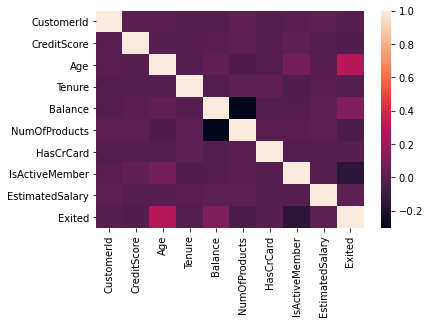

In [9]:
# check correlation between the features and the label, Exited
corr = df.corr()
sns.heatmap(corr)
plt.savefig('correlation.png', bbox_inches='tight', pad_inches=0.0, dpi = 300)

## Univariate analysis

#### Perform univariate analysis on Exited column. Note that 79.63% of customers (7963 counts) have not exited whereas 20.37% of customers have exited (2037 counts)

In [10]:
# Count the number of instances (CustomerId) based on a specific dimension (Exited)
exited = df.groupby(['Exited'])["CustomerId"].count()
exited

Exited
0    7963
1    2037
Name: CustomerId, dtype: int64

In [11]:
# Retrieve the labels 
exited.index

Int64Index([0, 1], dtype='int64', name='Exited')

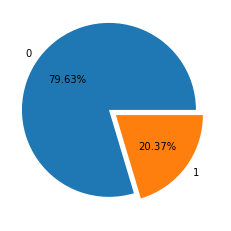

In [12]:
# Create Pie Chart
plt.pie(exited, explode=(0.1,0), labels=exited.index, autopct='%1.2f%%')
plt.savefig('exited.png', dpi = 300)

#### Perform univariate analysis on Gender column. Note that 45.43% of customers (4543 counts) are female whereas 54.57% of customers are male (5457 counts)

In [13]:
# Count the number of instances (CustomerId) based on a specific dimension (Gender)
gender = df.groupby(['Gender'])["CustomerId"].count()
gender

Gender
Female    4543
Male      5457
Name: CustomerId, dtype: int64

In [14]:
# Retrieve the labels
gender.index

Index(['Female', 'Male'], dtype='object', name='Gender')

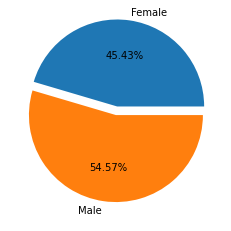

In [15]:
# Create Pie Chart
plt.pie(gender, explode=(0.1,0), labels=gender.index, autopct='%1.2f%%')
plt.savefig('gender.png', dpi = 300)

#### Perform univariate analysis on Geography column. Note that 50.14% of customers are from france (5014 counts), 25.09% are from germany (2509 counts) and 24.77% of customers are from spain (2477 counts)

In [16]:
# Count the number of instances (CustomerId) based on a specific dimension (Geography)
country = df.groupby(['Geography'])["CustomerId"].count()
country

Geography
France     5014
Germany    2509
Spain      2477
Name: CustomerId, dtype: int64

In [17]:
# Retrieve the labels
country.index

Index(['France', 'Germany', 'Spain'], dtype='object', name='Geography')

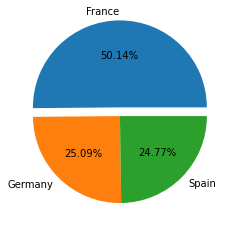

In [18]:
# Create Pie Chart
plt.pie(country, explode=(0.1,0,0), labels=country.index, autopct='%1.2f%%')
plt.savefig('country.png', dpi = 300)

#### Check the distribution of customer's age. The age ranges from 18 to 92 yrs old, with a unimodal distribution

In [19]:
# check to see the range of age of these customers
df['Age'].sort_values()

RowNumber
3513    18
1679    18
3518    18
9521    18
2022    18
        ..
3388    84
3034    85
2459    88
6760    92
6444    92
Name: Age, Length: 10000, dtype: int64

C:\Users\Vincent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


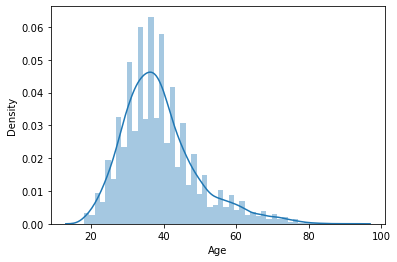

In [20]:
# Check to see the distribution of the Age column
sns.distplot(df['Age'])
plt.savefig('age distribution.png', dpi = 300)

#### The data set has 3617 counts of zero balance which seemed unusually high numbers, note that the distribution of balance column is bi-modal which requires careful analysis as the zeros will skew the statistical results.

In [21]:
# check to see what is the range of balance of these customers in this dataframe
df.sort_values(by = 'Balance')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
5149,15812767,Harvey,731,Spain,Male,70,3,0.00,2,1,1,141180.66,0
5144,15670584,Nkemakolam,646,Spain,Male,31,2,0.00,1,1,1,170821.43,1
5143,15778526,Bradshaw,719,Spain,Female,48,5,0.00,2,0,0,78563.66,0
5142,15662500,Ts'ao,774,Spain,Male,32,9,0.00,2,1,0,10604.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6718,15586674,Shaw,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
3589,15571958,McIntosh,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
8734,15714241,Haddon,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1


In [22]:
# check to see how many zero balances are there
df['Balance'].value_counts().sort_values(ascending = False)

0.00         3617
105473.74       2
130170.82       2
139875.20       1
126265.88       1
             ... 
107362.80       1
99282.63        1
167026.61       1
83568.55        1
158373.23       1
Name: Balance, Length: 6382, dtype: int64

In [23]:
# Note that it is very unusual for customer to be not Exited, has bank products, has credit card, 
# is an active member but yet has zero balance in their bank account. Need to filter away these zero balances
# when using tableau to visualize the data

df.sort_values(by = 'Balance').head(3617)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1
5149,15812767,Harvey,731,Spain,Male,70,3,0.0,2,1,1,141180.66,0
5144,15670584,Nkemakolam,646,Spain,Male,31,2,0.0,1,1,1,170821.43,1
5143,15778526,Bradshaw,719,Spain,Female,48,5,0.0,2,0,0,78563.66,0
5142,15662500,Ts'ao,774,Spain,Male,32,9,0.0,2,1,0,10604.48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,15601848,Scott,594,France,Male,35,2,0.0,2,1,0,103480.69,0
7,15592531,Bartlett,822,France,Male,50,7,0.0,2,1,1,10062.80,0
1238,15634267,Yudin,717,France,Male,42,5,0.0,2,1,0,172665.21,0


C:\Users\Vincent\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


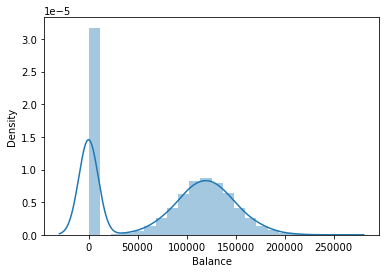

In [24]:
# Check to see the distribution of the Balance column
sns.distplot(df['Balance'])
plt.savefig('balance distribution.png', dpi = 300)

## Bivariate analysis

### (i) Customer’s demographics segmentation - Does one’s demographics such as geographical location, age and gender influence the decision to churn/exit?

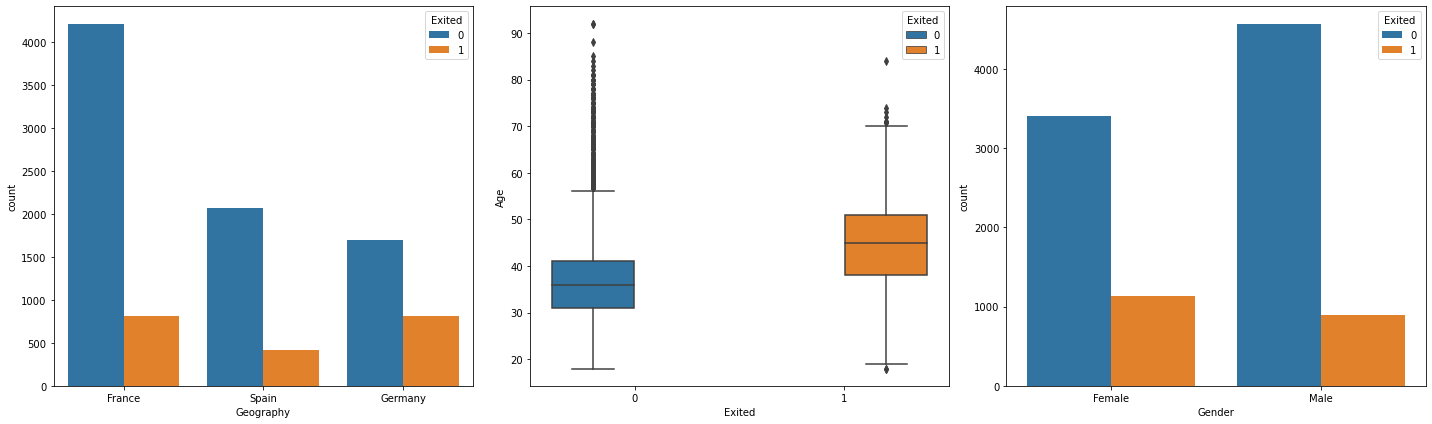

In [25]:
# Use sns.countplot for categorical variables, sns.boxplot for continuous variables, use hue = 'Exited' to classify them
# use plt.subplots(1, 3) to generate a canvas of 1 row and 3 columns for the different charts
# save the picture to be used in the report
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.countplot(x='Geography', hue='Exited', data=df, ax=ax[0])
sns.boxplot(y='Age', x='Exited', hue='Exited', data=df, ax=ax[1])
sns.countplot(x='Gender', hue='Exited', data=df, ax=ax[2])
plt.tight_layout()
fig.savefig('Customer demographics.png', dpi = 300)

1. Based on customer’s geographical locations, among those who have not exited, customers from France are the highest, followed by Spain and Germany. Among those who have exited, customers from France and Germany have the same numbers, with Spain the least number among them. 
2. Based on customer’s age, the median age for those who have not exited is about 35 compared to a median age of about 45 for those who have exited. The distribution of these two boxplots also differs from each other. Note that there are quite a number of outliers in these two boxplots due to elderly customers (age > 55) who have bank accounts, which in this case seemed pretty normal for elderly to have bank accounts. 
3. Based on customer’s gender, among those who have not exited, majority of the customers are male as compared to female. On the other hand, among those who have exited, female customers are slightly higher than male customers.

In summary, it is clear that the distribution of age segmentation with regards to exit status seems to differ from each other, suggesting that customer’s age may determine whether one exits or not. However, there seems to be no relationship between geographical locations, gender and exit status.


### (ii) Customer’s financial status segmentation - Does one’s financial status such as income and bank account balance influence the decision to churn/exit?


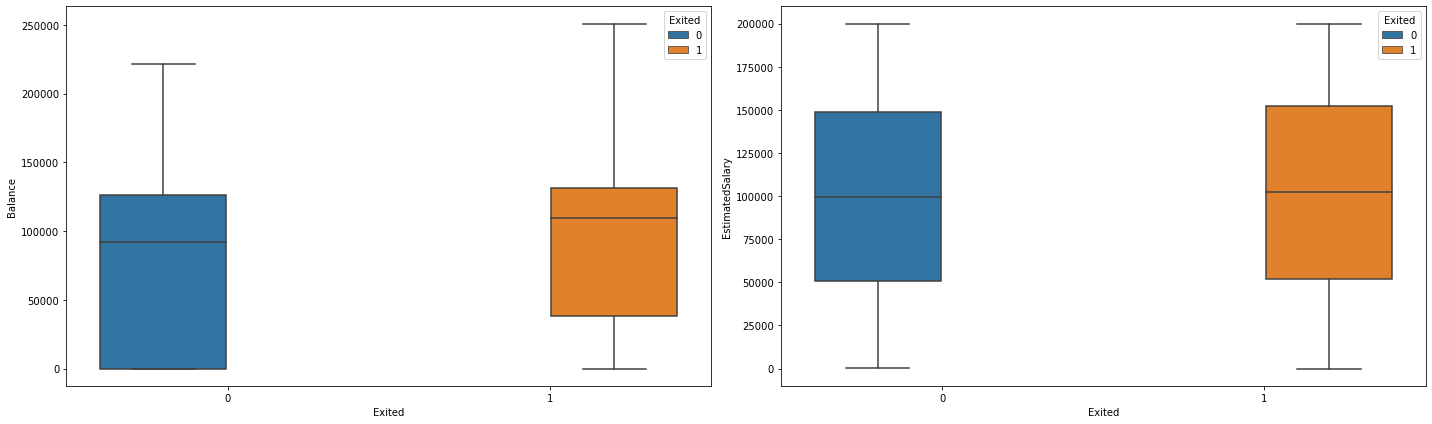

In [26]:
# Use sns.boxplot for continuous variables, , use hue = 'Exited' to classify them
# use plt.subplots(nrows=1, ncols=2) to generate a canvas of 1 row and 2 columns for the different charts
# save the picture to be used in the report
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.boxplot(y='Balance', x='Exited', hue='Exited', data=df, ax=ax[0])
sns.boxplot(y='EstimatedSalary', x='Exited', hue='Exited', data=df, ax=ax[1])
plt.tight_layout()
fig.savefig('Customer financial status.png', dpi = 300)

1. Based on customer’s account balance, the median balance for customers who have not exited is about 95,000 vs. a median balance of about 110,000 for customers who have exited. Their distributions do not differ much, although one needs to beware of the large counts of zero balances in this feature in order to draw a more accurate conclusion.
2. Based on customer’s estimated salary, both the median salary for customers who have not exited and exited is about 100,000, and their distributions are similar to each other. 

In summary, there seems to be no relationship between account balance, salary of customers and exit status.


### (iii) Customer’s bank-associated activities segmentation - Does one’s bank-associated activities such as the number of bank products, possession of credit cards and being an active member of the bank influence the decision to churn/exit?


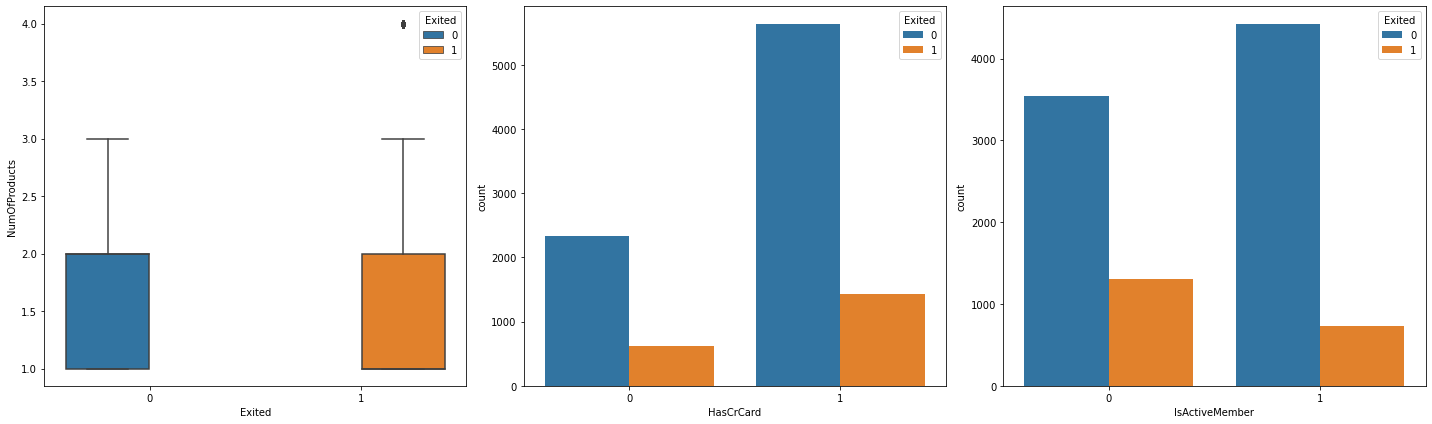

In [27]:
# Use sns.countplot for categorical variables, sns.boxplot for continuous variables, use hue = 'Exited' to classify them
# use plt.subplots(1, 3) to generate a canvas of 1 row and 3 columns for the different charts
# save the picture to be used in the report
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
sns.boxplot(y='NumOfProducts', x='Exited', hue='Exited', data=df, ax=ax[0])
sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=ax[1])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=ax[2])
plt.tight_layout()
fig.savefig('Customer bank associated activities.png', dpi = 300)

1. Based on customer’s number of bank products, there is no difference in their distribution and they look similar to each other.
2. Based on customer’s credit card possession, among customers who have not exited, majority of them have credit cards. Similarly, among those who have exited, majority of the customers have credit cards also. 
3. Based on customers being an active member, among customers who have not exited, majority of them are active members. Similarly, among those who have exited, majority of the customers are active members also. 

In summary, there seems to be no relationship between number of bank products, credit card possession or being an active member and exit status.


### (iv) Customer’s bank records segmentation - Does one’s bank records such as credit score and number of years of tenure influence the decision to churn/exit?


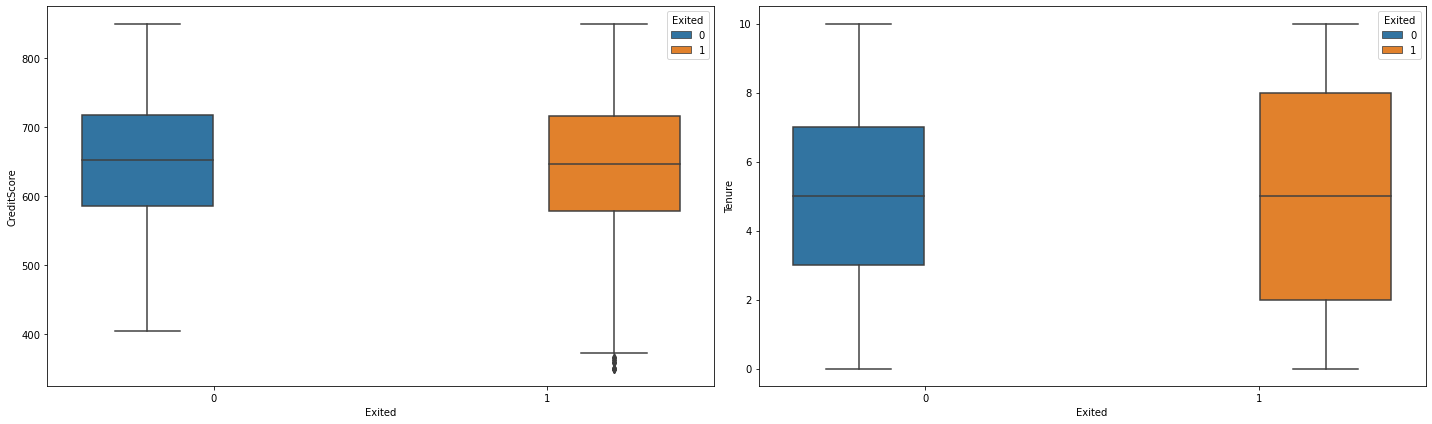

In [28]:
# Use sns.boxplot for continuous variables, , use hue = 'Exited' to classify them
# use plt.subplots(nrows=1, ncols=2) to generate a canvas of 1 row and 2 columns for the different charts
# save the picture to be used in the report
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
sns.boxplot(y='CreditScore', x ='Exited', hue='Exited', data=df, ax=ax[0])
sns.boxplot(y='Tenure', x='Exited', hue='Exited', data=df, ax=ax[1])
plt.tight_layout()
fig.savefig('Customer bank records.png', dpi = 300)

1. Based on customer’s credit scores, there is no difference in their distribution and they look similar to each other, with median scores of about 650.
2. Based on customer’s tenure, there is no difference in their distribution and they look similar to each other, with median years of about 5.

In summary, there seems to be no relationship between customer’s credit scores, tenure and exit status.


## Conclusion <a id="part8"></a>

Taken together, the initial observations suggest that the feature ‘Age’ most likely influences the decision made by the customer to exit or not. However, further segmentation of this feature needs to be done in order to find out which age group should the bank focus on in order to retain customers and decrease the number of customers exiting the bank. 

## End of Notebook